In [275]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

train = pd.read_csv("./data/train.csv", sep="###__###",header = None,encoding = "utf-8")
test = pd.read_csv("./data/test.csv", sep="###__###",header = None,encoding = "utf-8")

In [276]:
train.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']
train.head()

,ID,Age,Gender,Education,Query_List
0,22DD920316420BE2DF8D6EE651BA174B,1,1,4,柔和双沟\t女生\t中财网首页 财经\thttp://pan.baidu.com/s/1pl...
1,43CC3AF5A8D6430A3B572337A889AFE4,2,1,3,"广州厨宝烤箱\t世情薄,人情恶,雨送黄昏花易落,晓风干,泪痕\t厦门酒店用品批发市场\t我只..."
2,E97654BFF5570E2CCD433EA6128EAC19,4,1,0,钻石之泪耳机\t盘锦到沈阳\t旅顺公交\t辽宁阜新车牌\tbaidu\tk715\tk716...
3,6931EFC26D229CCFCEA125D3F3C21E57,4,2,3,最受欢迎狗狗排行榜\t舶怎么读\t场景描 写范例\t三维绘图软件\t枣和酸奶能一起吃吗\t好...
4,E780470C3BB0D340334BD08CDCC3C71A,2,2,4,干槽症能自愈吗\t太太万岁叶舒心去没去美国\t干槽症\t右眼皮下面一直跳是怎么回事\t麦当劳...


In [269]:
train.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       100000 non-null  object
 1   1       100000 non-null  int64 
 2   2       100000 non-null  int64 
 3   3       100000 non-null  int64 
 4   4       100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [272]:
train.describe()

,1,2,3
count,100000.000000,100000.000000,100000.000000
mean,2.082310,1.387140,3.903330
std,1.184276,0.529495,1.522205
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000
50%,2.000000,1.000000,4.000000
75%,3.000000,2.000000,5.000000
max,6.000000,2.000000,6.000000


In [33]:
train.shape

(100000, 5)

In [34]:
train.loc[:,"content_lens"] =train.Query_List.apply(lambda x:len(x))
train.loc[:,"content_num"] = train.Query_List.apply(lambda x: x.count("\t"))
def choice_maxtext(x):
    word_list = x.split('\t') #用逗号转换为列表
    word_len_list = [len(word) for word in word_list]
    max_word_len = max(word_len_list)
    return max_word_len
train.loc[:,"max_len"] = train.Query_List.apply(lambda x: choice_maxtext(x))
def choice_null(x):
    word_list = x.split('\t') #用逗号转换为列表
    count = 0
    for word in word_list:
        if " " in word:
            count+=1
        else:
            continue
    return count
train.loc[:,"null_text"] = train.Query_List.apply(lambda x: choice_null(x))
def english_text(x):
    word_list = x.split('\t') #用逗号转换为列表
    count = 0
    for word in word_list:
        if word.isalpha():
            count+=1
        else:
            continue
    return count
train.loc[:,"english_text"] = train.Query_List.apply(lambda x: english_text(x))
train.loc[:,"mean_length"] = train["content_lens"]/train["content_num"]
train.loc[:,"english_precent"] = train["english_text"]/train["content_num"]
train.loc[:,"null_precent"] = train["null_text"]/train["content_num"]
train.tail()

,ID,Age,Gender,Education,Query_List,content_lens,content_num,max_len,null_text,english_text,mean_length,english_precent,null_precent
99995,E797FFCDCAF3899AB4D17B61170D8BFF,1,1,5,梦三生\t逆行天后漫画结局\t英雄联盟角色介绍大全\t韩剧网最新韩国电视剧\t119宣传语是...,805,94,30,0,83,8.563830,0.882979,0.000000
99996,E06375F7D092ABDE78C2D79E4725D6B0,1,1,5,中国军队配枪\t女生\t央视版权问题\t重庆\t一次性手术刀\t精神枷锁\t人民检察官\t舆...,1748,300,15,1,284,5.826667,0.946667,0.003333
99997,D55119CB0B9366B20974522B58C00912,2,2,5,英文翻译\t幼儿园面试讲课\t学前教育书第二版\tshock to\t幼儿园教师资格证面试讲...,858,89,28,8,81,9.640449,0.910112,0.089888
99998,EB4DBBD602C6459A19A77F09035E170C,3,2,3,哈尔滨祖研中医院地址\t指甲盖侧面的肉怎么是白色\t补骨质有副作用吗\t哈尔滨去呼兰\t黑龙...,1058,111,22,1,105,9.531532,0.945946,0.009009
99999,61CF81DB79423CB89E5DAA752BC4D9DD,1,2,5,陈翔毛晓彤分手\t青春偶像剧校园电影\t九尾狐家族\t王俊凯小说\t女娲的成长日记女娲变身\...,2251,269,17,2,255,8.368030,0.947955,0.007435


<AxesSubplot:>

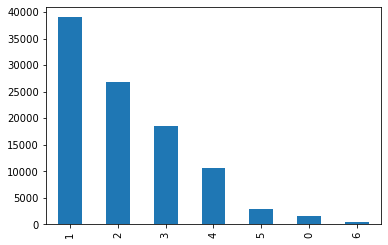

In [5]:
train.Age.value_counts().plot(kind = "bar")

<AxesSubplot:ylabel='Gender'>

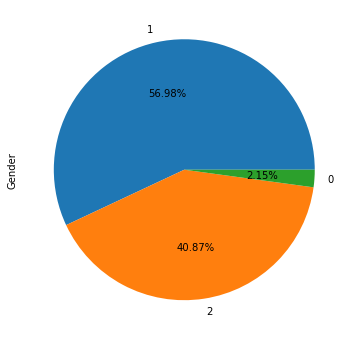

In [6]:
train["Gender"].value_counts().plot.pie(autopct = "%.2f%%",figsize = (6,6))

<AxesSubplot:xlabel='Education', ylabel='null_precent'>

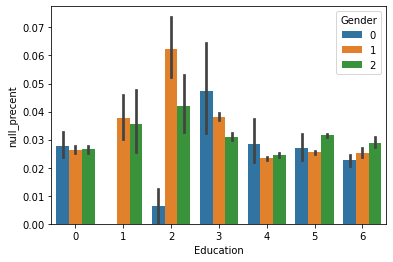

In [7]:
sns.barplot(x = "Education",y = "null_precent",hue = "Gender",data = train)

<AxesSubplot:xlabel='Education', ylabel='english_precent'>

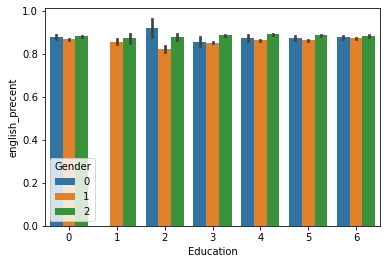

In [9]:
sns.barplot(x = "Education",y = "english_precent",hue = "Gender",data = train)

<AxesSubplot:xlabel='Education', ylabel='content_num'>

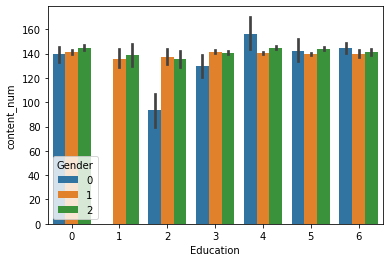

In [11]:
sns.barplot(x = "Education",y = "content_num",hue = "Gender",data = train)

<AxesSubplot:xlabel='Education', ylabel='max_len'>

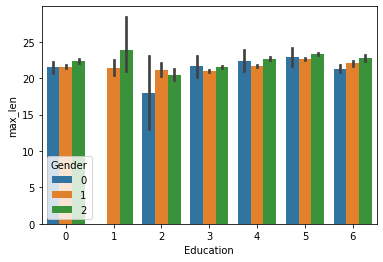

In [12]:
sns.barplot(x = "Education",y = "max_len",hue = "Gender",data = train)

<AxesSubplot:xlabel='Education', ylabel='content_lens'>

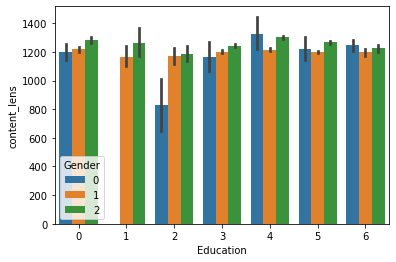

In [13]:
sns.barplot(x = "Education",y = "content_lens",hue = "Gender",data = train)

对于数据的初步统计发现：对原始搜索内容进行进一步的梳理后发现，受教育状况以及性别的差异对于搜索内容和空字符串关系相对较为密切，此次先按照原始数据进行数据建模，在之后进行多个模型训练以及调参过程中进行完善和修改

# 数据预处理与特征提取

按照原有数据进行切分，对数据集选择了大概两万分数据进行训练和测试。

In [ ]:
trainname = pd.read_csv("./data/train.csv", sep="###__###",header = None,encoding = "utf-8")
trainname.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']
trainname = trainname.dropna()

In [170]:
#将数据进行标签分类，按照年龄、性别、受教育状况以及询问内容文本
train.Age.to_csv("./data/train_age.csv",index = False)
train.Gender.to_csv("./data/train_gender.csv",index = False)
train.Education.to_csv("./data/train_education.csv",index = False)
train.Query_List.to_csv("./data/train_querylist.csv",index = False)

# 对数据进行分词

对训练数据中的搜索内容进行基本处理，数据分词。

In [3]:
trainname = pd.read_csv("./data/train.csv", sep="###__###",header = None,encoding = "utf-8")
trainname.columns = ['ID', 'Age', 'Gender', 'Education', 'Query_List']
trainname = trainname.dropna()
content_lines = trainname.Query_List.values.tolist()[:20000]

stopwords=pd.read_csv("./data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')
stopwords=stopwords['stopword'].values

In [4]:
import pandas as pd
import jieba.analyse
import time
import jieba
import jieba.posseg
import os,sys

writepath = "./data/querylist.csv"
csvfile = open(writepath,"w")
sentences = []
for line in content_lines:
    try:
        segs=jieba.lcut(line)
        segs = list(filter(lambda x:len(x)>1, segs)) #没有解析出来进行滤掉
        segs = list(filter(lambda x:x not in stopwords, segs)) #把停用词过滤掉
        sentences.append((" ".join(segs)))
        csvfile.write(" ".join(segs)+"\n")
       
    except Exception as e:
        print(line)
        continue

csvfile.close()


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\小马哥\AppData\Local\Temp\jieba.cache
Loading model cost 0.656 seconds.
Prefix dict has been built successfully.


In [121]:
sentences[:1]

['柔和 双沟 女生 中财网 首页 财经 http pan baidu 1plpjtn9 周公 解梦 大全 查询 2345 曹云金 再讽 郭德纲 总裁 大人 行行好 中财网 第一 财经 传媒 教师节 全文 砸毁 墓碑 黄岩岛 最新 海图 缘来 迟落 甜心 不好惹 梁朝伟 替身 同框 笑傲江湖 电视剧 任贤齐 小起 名字 女孩 名字 海运 行李 堪培拉 诱爱 司少 天价 宝贝 遥控 魔棒 徽信 表情 动态 搞笑 图片 教师节 征文 安微 联通 网上 营业厅 甜宠 百分百 校草 萌萌 未婚妻 豪门 重生 之暖爱 成婚 nikehypershift kd5 好看 韭菜 炒鸡蛋 陈赫 王者 荣耀 虎牙 楚河 三国演义 小说 txt 下载 威县 欧派 好吃 黄岩岛 最新消息 中秋节 诗句 大全 祝福 教师节 征文 菜谱 柔和 双沟 七位数 开奖 以色列 停车场 坍塌 天龙 家庭 农场 7.22 星座 新旧 圣经 合本 下载 wifi 万能钥匙 威灵仙 图片 临泉 长官 天龙 家庭 农场 早安 总统 大人 百合 莲藕 做法 花街 无锡 蚬壳 胃散 触手 忆寒 中秋节 诗句 孟州 电信 电子 发票 鸡丝 做法 临泉 长官 镇桥口 李小刚 农场 朋仇 全民 葱花 蒜苔 炒肉 冰川 图片 kd5 若风 好奇 纸尿裤 清蒸鱼 189.8 平方 重庆 餐馆 发生爆炸 手机 失主 抢劫 https yunpan cn ocsqfgtfya2ewj 家常 做法 三国演义 小说 百度 总裁 掠爱 小舅 太坏 https yunpan cn cmh8tmeyraiww 周公 解梦 坦克 冰川 凉拌 藕片 做法 投票 鸡丝 好吃 时光 掩埋 秘密 小说 下载 中国电信 电子 发票 张续 月亮 诗句 酵母 馒头 方法 赵丽颖 碧瑶 触手 兵长 图集 下载 腾讯 新闻 街头 混战 武警 厦门航空 蚬壳 胃散 茄子 做法 身份 类别 方特 生活 强迫症 表现 白袍 法师 图片 朋仇 广场 小宇 热游 馒头 方法 狡滑 黄石 大冶 东岳 派出所 服务 电话 三国演义 小说 下载 txt http zxjhjc9088.1688 松柏 道馆 10.1 高速 免费 几天 三国演义 小说 txt 柔和 双沟 业务 待遇 酵母 馒头 方法 初中 家教 一对一 辅导 口子 中秋节 祝福 诗句 侠岚 王国 价格表 1

In [5]:
import random
random.shuffle(sentences)

分完词之后，对词进行向量化处理，首先采用word2vec词向量模型

In [6]:
from  gensim.models import word2vec
#将列表数据转化为列表嵌套的格式
train_path = "./data/querylist.csv"
with open(train_path,"r") as f:
    my_list = []
    lines = f.readlines()
    for line in lines:
        cur_list = []
        line = line.strip()
        data = line.split(" ")
        for i in data:
            cur_list.append(i)
        my_list.append(cur_list)
    model = word2vec.Word2Vec(my_list,vector_size = 300, window=5, min_count=5, workers=4)
    savepath = "word2vec_list" +"300" +".model"
    
    model.save(savepath)

In [7]:
model.wv.most_similar("大哥")

[('黑帮', 0.7019625902175903),
 ('教父', 0.6836597323417664),
 ('大佬', 0.6746853590011597),
 ('方休', 0.6652513742446899),
 ('干爹', 0.6645916700363159),
 ('末代', 0.6522518992424011),
 ('黑道', 0.6510862112045288),
 ('演绎', 0.648783266544342),
 ('花子', 0.6444159746170044),
 ('亿万富翁', 0.6430135369300842)]

通过加载训练好的Word2vec模型数据，求解用户搜索的平均向量

In [8]:
import numpy as np
import gensim.models
file_name = "./data/querylist.csv"
cur_model = gensim.models.Word2Vec.load("word2vec_list300.model")
with open(file_name,"r") as f:
    cur_index = 0
    lines = f.readlines()
    doc_cev = np.zeros((len(lines),300))#用户的总的维度，因为每一行为一个用户，一个用户一个维度
    for line in lines:
        word_vec = np.zeros ((1,300))#对每个用户提取的平均维度为300
        words= line.strip().split(" ")
        word_num = 0
        for word in words:
            if word in cur_model.wv:
                word_num +=1
                word_vec +=np.array([cur_model.wv[word]])
        doc_cev[cur_index] = word_vec/float(word_num)
        cur_index +=1
            
        
        
    

In [9]:
doc_cev.shape

(20000, 300)

In [10]:
doc_cev[1]

array([ 0.14908757, -0.17180709,  0.01584814,  0.14293566,  0.05564202,
       -0.09617478, -0.20904111,  0.61533658, -0.07713081,  0.18978622,
       -0.12672779, -0.11120831, -0.04906999,  0.18505523, -0.14182814,
       -0.27023353, -0.08665189, -0.10562177,  0.12030746,  0.01838882,
        0.02673236, -0.13369347,  0.19123078, -0.00152419,  0.02168346,
       -0.12814043, -0.38060583,  0.10476884, -0.03055077,  0.1571332 ,
       -0.07228731, -0.18039409,  0.06419536, -0.00159628,  0.05187549,
        0.34507688, -0.06903019, -0.33752514,  0.1342286 , -0.26874844,
       -0.26795989,  0.08054863,  0.18430582, -0.06785425,  0.01989662,
       -0.07815432,  0.08812722, -0.16024117, -0.14763951,  0.28434724,
        0.27681669, -0.06861033, -0.05785152,  0.07844341, -0.28253815,
        0.14630954,  0.24705126,  0.04363953,  0.24004818,  0.07861766,
       -0.2606137 , -0.02730169,  0.34842157, -0.07974705,  0.03730889,
        0.24122244,  0.10787229,  0.19515402,  0.02499774, -0.19

In [11]:
genderlabel = np.loadtxt(open("./data/train_gender.csv")).astype(int)
genderlabel = genderlabel[:20000]
genderlabel.shape

(20000,)

In [12]:
agelabel = np.loadtxt(open("./data/train_age.csv")).astype(int)
agelabel = agelabel[:20000]
agelabel.shape

(20000,)

In [13]:
edulabel = np.loadtxt(open("./data/train_education.csv")).astype(int)
edulabel = edulabel[:20000]
edulabel.shape

(20000,)

In [14]:
def removezero(x,y):
    nozero = np.nonzero(y)
    y = y[nozero]
    x = np.array(x)
    x = x[nozero]
    return x,y
gender_train,genderlabel = removezero(doc_cev,genderlabel)
age_train,agelabel = removezero(doc_cev,agelabel)
edu_train,edulabel = removezero(doc_cev,edulabel)
print(gender_train.shape,genderlabel.shape)
print(age_train.shape,agelabel.shape)
print(edu_train.shape,edulabel.shape)

(19556, 300) (19556,)
(19677, 300) (19677,)
(18105, 300) (18105,)


绘制函数，以性别为例，绘制混淆矩阵

In [41]:
import itertools
def plot_confusion_matrix(cm, classes,
                         title = "confuison matrix",
                         cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation = "nearest",cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = 0)
    plt.yticks(tick_marks,classes)
    
    thresh = cm.max()/2.
    for i ,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predict label")                              

构造测试集，先略过，因为没有标签集进行测试，

In [ ]:
import numpy as np
import gensim.models
file_name = "./data/test.csv"
cur_model = gensim.models.Word2Vec.load("word2vec_list300.model")
with open(file_name,"r") as f:
    cur_index = 0
    lines = f.readlines()
    doc_cev = np.zeros((len(lines),300))#用户的总的维度，因为每一行为一个用户，一个用户一个维度
    for line in lines:
        word_vec = np.zeros ((1,300))#对每个用户提取的平均维度为300
        words= line.strip().split(" ")
        word_num = 0
        for word in words:
            if word in cur_model.wv:
                word_num +=1
                word_vec +=np.array([cur_model.wv[word]])
        doc_cev[cur_index] = word_vec/float(word_num)
        cur_index +=1
            

0.8093047034764826
Recall metric in the test dataset:  0.7537406483790524
accuracy metric in the test dataset:  0.8093047034764826


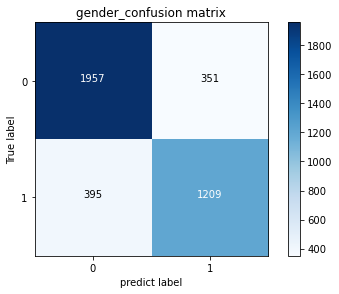

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gender_train,genderlabel,test_size = 0.2,random_state = 2022)

LR_model = LogisticRegression()

LR_model.fit(X_train,y_train)
y_pred = LR_model.predict(X_test)
print(LR_model.score(X_test,y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)

print("Recall metric in the test dataset: ",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("accuracy metric in the test dataset: ",(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1]))

calss_names = (0,1)
plt.figure()

plot_confusion_matrix(cnf_matrix,
                      classes =calss_names,
                      title = "gender_confusion matrix")
plt.show()

0.7955010224948875
Recall metric in the test dataset:  0.728380024360536
accuracy metric in the test dataset:  0.7955010224948875


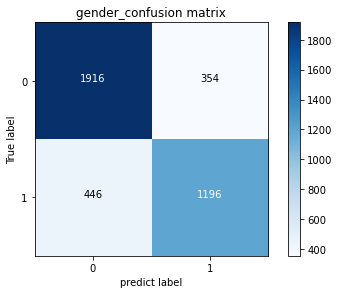

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(gender_train,genderlabel,test_size = 0.2,random_state = 1)

RF_model = RandomForestClassifier(n_estimators=200,min_samples_split =3,max_depth = 8)

RF_model.fit(X_train,y_train)
y_pred = RF_model.predict(X_test)
print(RF_model.score(X_test,y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)

print("Recall metric in the test dataset: ",cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("accuracy metric in the test dataset: ",(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1]))

calss_names = (0,1)
plt.figure()

plot_confusion_matrix(cnf_matrix,
                      classes =calss_names,
                      title = "gender_confusion matrix")
plt.show()

在此基础上，对模型采取了堆叠的形式，以提高模型的预测精度

In [212]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

clf1 = RandomForestClassifier(n_estimators =100,min_samples_split = 5,max_depth = 10)
clf2 = SVC()
clf3 = LogisticRegression()
basemodes = [
            ["rf",clf1],
            ["SVC",clf2],
            ["lr",clf3]
            ]

In [236]:
from sklearn.model_selection import StratifiedKFold

kf = KFold(y_train.shape[0], n_splits=3, random_state=1, shuffle=False)

In [239]:
from sklearn.model_selection import StratifiedKFold
import param
models = basemodes

#X_train,X_test,y_train,y_test
n = 5
param.seed=1

list1 =[]

kf = KFold(n_splits=5, shuffle=False, random_state=1)

S_train = np.zeros((X_train.shape[0],len(models)))
S_test = np.zeros((X_test.shape[0],len(models)))

for i,bm in enumerate(models):
    clf = bm[1]
                   #S_test[:,i] = clf.predict(X_test)
    for  (train_idx,test_idx) in kf.split(y_train):
        X_train_cv = X_train[train_idx]
        y_train_cv = y_train[train_idx]
        X_val = X_train[test_idx]
        clf.fit(X_train_cv,y_train_cv)
        y_val = clf.predict(X_val)[:]
                   
        S_train[test_idx,i] = y_val
    S_test[:,i] = clf.predict(X_test)
                  
                   
final_clf = RandomForestClassifier(n_estimators =100)
final_clf.fit(S_train,y_train)
                
print(final_clf.score(S_test,y_test))
                   
                   

0.8100715746421268
